In [ ]:
## Test the duplicate code with known duplicates. Need to first identify known duplicates.


In [3]:
!pip install xarray
!pip install netCDF4
!pip install h5netcdf
!pip install numpy pandas
!pip install matplotlib

import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# filepath and files
filepath = '/Volumes/CARSv2_ancillary/CODA/CODAv1/testdups/'
# get filenames with the .nc extension
files = [f for f in os.listdir(filepath) if f.endswith('.nc')]

In [6]:
print(filepath + files[0])

/Volumes/CARSv2_ancillary/CODA/CODAv1/testdups/MNF_CODA_2011_ctd.nc


In [7]:
# open the file with xarray
ds = xr.open_dataset(filepath + files[0])
# open the second file with xarray
ds2 = xr.open_dataset(filepath + files[1])

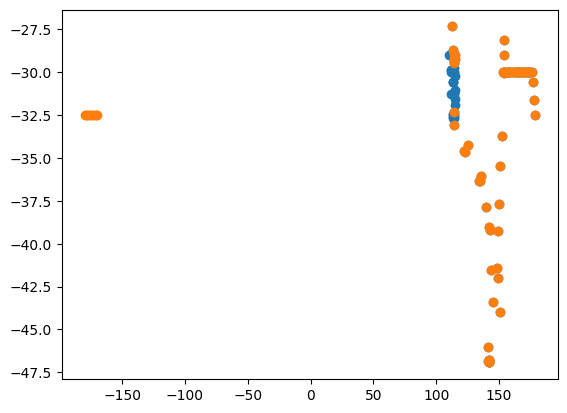

In [8]:
# plot the locations of the data
plt.scatter(ds['lon'], ds['lat'])
plt.scatter(ds2['lon'], ds2['lat'])
plt.show()

In [9]:
# find close matches in lat and lon in the two files
matches = []
for i in range(len(ds['lat'])):
    for j in range(len(ds2['lat'])):
        if abs(ds['lat'][i] - ds2['lat'][j]) < 0.0001 and abs(ds['lon'][i] - ds2['lon'][j]) < 0.0001:
            matches.append((i, j))

print(matches)


[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 49), (40, 50), (41, 51), (42, 52), (43, 53), (44, 54), (45, 55), (46, 56), (82, 57), (83, 58), (84, 59), (85, 60), (86, 61), (87, 62), (88, 63), (89, 64), (90, 65), (91, 66), (92, 67), (93, 68), (94, 69), (95, 70), (96, 71), (97, 72), (98, 73), (99, 74), (100, 75), (101, 76)]


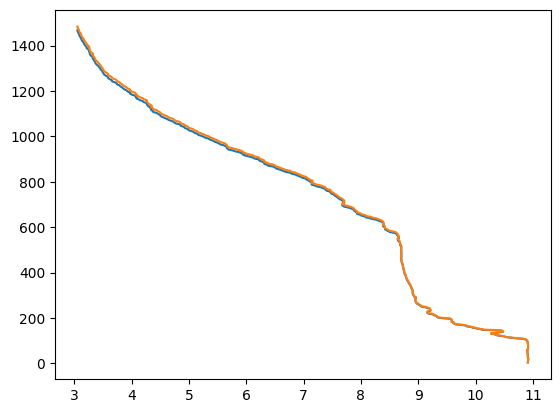

In [10]:
# now plot temperature vs depth for vs dmatching points
plt.plot(ds['Temperature'][matches[0][0]], ds['z'][matches[0][0]])
plt.plot(ds2['Temperature'][matches[0][1]], ds2['z'][matches[0][1]])
plt.show()



